## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 1: Let's GOOOOO!

- **100 points [7% of your final grade]**
- **Due Tuesday, February 13 by 11:59pm**

***Goals of this homework:***
1. Collect data from the web, clean it, and then make some observations based on exploratory data analysis
2. Understand and implement the classic apriori algorithm and extensions to find the association rules in a movie rating dataset

***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. 

***Late Days:***

As a reminder, you may use up to three of your late days on this homework, meaning the latest we will accept it is February 16 by 11:59pm.

***Collaboration declaration:***

If you worked with someone on this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

## (50 points) Part 1: UFOs

### (10pts) Part 1a: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going 
to focus only on UFO sightings in Texas, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlTX.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. 
You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. 
In particular, we're going to use the Python libraries **[requests](http://docs.python-requests.org/en/master/)** 
and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [1]:
# your code here
# you should use requests to get the webpage, then extract 
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd


# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufos_in_texas.csv'

In [2]:
html_text = requests.get('http://www.nuforc.org/webreports/ndxlTX.html').text
soup = BeautifulSoup(html_text, 'html5lib')
headers = soup.find('tr')
col_names = []
for hdr in headers.find_all('th'):
  col_names.append(hdr.text)

csv_file = open('ufos_in_texas.csv','w')

csv_writer = csv.writer(csv_file)
csv_writer.writerow(col_names)

for row_item in soup.find('tbody').find_all('tr'):
  row_values = []
  for row in row_item.find_all('td'):
    row_values.append(row.text)
  csv_writer.writerow(row_values)

csv_file.close()

Once you have your local csv file, you should read it in and then issue the .head() command.

In [3]:
# your code here
df = pd.read_csv('ufos_in_texas.csv')
test = df.head()
num_rows_original = df.shape[0]
df.head()


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
2,12/9/21 16:30,Lazerbet,TX,Other,Google maping,It's big,12/19/21
3,12/9/21 16:00,Lazerbet,TX,Triangle,NaN,Unhuman,12/19/21
4,12/7/21 17:30,Oak Cliff,TX,Unknown,NaN,I was randomly taking pictures of the clouds a...,12/19/21


In [4]:
df = df[df['Duration'].str.fullmatch('\d+\s(second|minute|hour|day)s?') == True]
#df.to_csv('filtered_df.csv', index=False)
df.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
14,11/6/21 14:00,Abilene,TX,Changing,30 minutes,"I was outside waiting on my ride, when a white...",11/15/21
16,10/25/21 17:18,Corpus Christi,TX,Other,40 minutes,Seven United States Postal workers in Corpus C...,10/26/21
18,10/23/21 03:30,Garland,TX,Light,7 hours,Early morning site & short encounter,11/15/21


### (15pts) Part 1b: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

You may find the **pandas** library to be very helpful for this part. Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Report the basic statistics of the duration in your new 'validated' dataset (report maximum, minimum, mean, and standard deviation values of duration). At last, plot a boxplot of the duration (in seconds) in your 'validated' dataset.

In [5]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds

df['Duration'].replace('( minute)s?', '*60 seconds', regex=True, inplace=True)
df['Duration'].replace('( hour)s?', '*3600 seconds', regex=True, inplace=True)
df['Duration'].replace('( day)s?', '*86400 seconds', regex=True, inplace=True)
df['Duration'].replace('( second)s?', '*1', regex=True, inplace=True)

#print(df.shape)


inter_m=df['Duration'].str.split("*",expand=True)
inter_m[0] = pd.to_numeric(inter_m[0], errors='coerce')
inter_m[1] = pd.to_numeric(inter_m[1], errors='coerce')

df['Duration']=inter_m[0] * inter_m[1]

df.to_csv('final.csv', index=False)
num_rows_filtered = df.shape[0]
df.head()




,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,480,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,600,A light that was fading in and out.,12/19/21
14,11/6/21 14:00,Abilene,TX,Changing,1800,"I was outside waiting on my ride, when a white...",11/15/21
16,10/25/21 17:18,Corpus Christi,TX,Other,2400,Seven United States Postal workers in Corpus C...,10/26/21
18,10/23/21 03:30,Garland,TX,Light,25200,Early morning site & short encounter,11/15/21


In [6]:
# your code here
# total rows in original dataset
# valid rows in your new 'validated' dataset

print("Total #rows in original dataset : {}".format(num_rows_original))
print("Total #rows in new 'validated' dataset : {}".format(num_rows_filtered))

Total #rows in original dataset : 5631
Total #rows in new 'validated' dataset : 2817


Max duration in the validated dataset : 345600
Min duration in the validated dataset : 1
Mean duration in the validated dataset : 1290.827831025914
Std Deviation of  duration in the validated dataset : 10850.471660312376


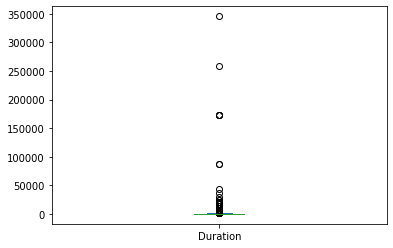

In [7]:
# your code here
# report the basic statistics of duration in 'validated' dataset
print("Max duration in the validated dataset : {}".format(df['Duration'].max()))
print("Min duration in the validated dataset : {}".format(df['Duration'].min()))
print("Mean duration in the validated dataset : {}".format(df['Duration'].mean()))
print("Std Deviation of  duration in the validated dataset : {}".format(df['Duration'].std()))

# boxplot code here
df['Duration'].plot(kind='box',showfliers=True) #with outliers 


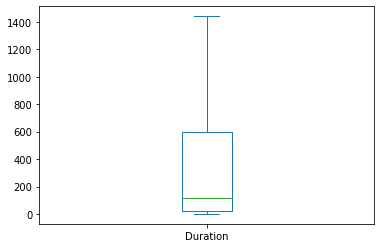

In [8]:
#df.boxplot(column='Duration')
df['Duration'].plot(kind='box',showfliers=False) #with outliers

### (15pts) Part 1c: Can we do better?
Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so **make detailed notes of what decisions you are making and why**.

In [9]:
# your code here 
# clean data 
import re
df = pd.read_csv('ufos_in_texas.csv')
test = df.head()
num_rows_original = df.shape[0]

#drop the rows which are empty
df.dropna(subset=['Duration'],inplace=True)

df['Duration'] = df['Duration'].str.replace(r'(<|>|~|\+|\.)s?', '', regex=True, case=False) #removing <,>,~

# processing elements like 3-4 minutes 
for index,row in df.iterrows():

  row['Duration']=str(row['Duration']) #converting to string type
  row['Duration'] = row['Duration'].lstrip()
  row['Duration'] = row['Duration'].rstrip()

  #removing characters present after x-y seconds as some have '.' or some additional text after the time unit
  if(re.match('\d+[-]?\d+?\s+(sec|second|min|minute|hr|hour|day|year)s?.*',row['Duration'],flags=re.IGNORECASE) != None):
    split_data = row['Duration'].split(" ") 
    row['Duration'] = split_data[0] + ' ' + split_data[1]

  #taking the mid point of the time range (example: 3-4 minutes => 3.5 minutes)
  if(re.match('\d+[-]\d+\s+(sec|second|min|minute|hr|hour|day|year)s?.*',row['Duration'],flags=re.IGNORECASE) != None):
    split_data = row['Duration'].split(" ")
    unit = split_data[1].split('.')[0]
    split_data = split_data[0].split("-")
    row['Duration'] = (float(split_data[0]) + float(split_data[1]))/2
    row['Duration'] = str(row['Duration']) + ' ' + unit
    
#handling the spelling errors and shorthands
df['Duration'] = df['Duration'].str.replace(r'\bsecs?\s?\b', 'seconds', regex=True, case=False) #replacing sec,secs with seconds
df['Duration'] = df['Duration'].str.replace(r'\bsecondss\b', 'seconds', regex=True, case=False) #replacing secondss with seconds 
df['Duration'] = df['Duration'].str.replace(r'\bmins?\s?\b', 'minutes', regex=True, case=False) #replacing min,mins with minutes
df['Duration'] = df['Duration'].str.replace(r'\bminutess\b', 'minutes', regex=True, case=False) #replacing minutess with minutes 
df['Duration'] = df['Duration'].str.replace(r'\bhrs?\b', 'hours', regex=True, case=False) #replacing hr/hrs with hours 

#filtering out the rows that don't have the data in the expected format
df = df[df['Duration'].str.fullmatch('\d+(\.\d+)?\s(second|minute|hour|day|year)s?', case=False) == True]

#converting all values to seconds
df['Duration'].replace('( minute)s?', '*60 seconds', regex=True, inplace=True)
df['Duration'].replace('( hour)s?', '*3600 seconds', regex=True, inplace=True)
df['Duration'].replace('( day)s?', '*86400 seconds', regex=True, inplace=True)
df['Duration'].replace('( year)s?', '*31536000 seconds', regex=True, inplace=True)
df['Duration'].replace('( second)s?', '*1', regex=True, inplace=True)

inter_m=df['Duration'].str.split("*",expand=True)
inter_m[0] = pd.to_numeric(inter_m[0], errors='coerce')
inter_m[1] = pd.to_numeric(inter_m[1], errors='coerce')

df['Duration']=inter_m[0] * inter_m[1]

# saving the cleaned data in a csv
df.to_csv('cleaned_seconds.csv', index=False)
num_rows_filtered = df.shape[0]
print(df.shape)
df.head()



(4220, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,480.0,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,600.0,A light that was fading in and out.,12/19/21
5,12/3/21 21:00,Sanderson,TX,Light,60.0,Sighting of odd light in night sky.,12/19/21
9,12/1/21 08:00,Austin,TX,Changing,157680000.0,((HOAX)) UFO on a star with men in red armore...,12/19/21
12,11/12/21 10:00,Hickory Creek,TX,Circle,150.0,2 identical circular orange spheres traveling ...,11/15/21


In [10]:
# your code here
# total rows in original dataset
print("Total #rows in original dataset : {}".format(num_rows_original))

# valid rows in your cleaned dataset
print("Total #rows in new 'validated' dataset : {}".format(df.shape[0]))


Total #rows in original dataset : 5631
Total #rows in new 'validated' dataset : 4220


Max duration in the validated dataset : 157680000.0
Min duration in the validated dataset : 1.0
Mean duration in the validated dataset : 40636.01998026641
Std Deviation of  duration in the validated dataset : 2476541.776484255


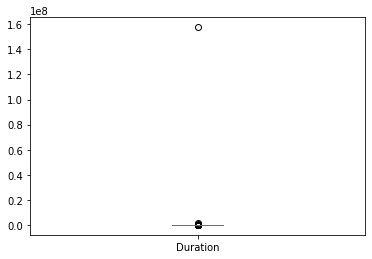

In [11]:
# your code here
# report the basic statistics of duration in your cleaned dataset

print("Max duration in the validated dataset : {}".format(df['Duration'].max()))
print("Min duration in the validated dataset : {}".format(df['Duration'].min()))
print("Mean duration in the validated dataset : {}".format(df['Duration'].mean()))
print("Std Deviation of  duration in the validated dataset : {}".format(df['Duration'].std()))

# draw a boxplot for your cleaned dataset
df['Duration'].plot(kind='box',showfliers=True) #with outliers 

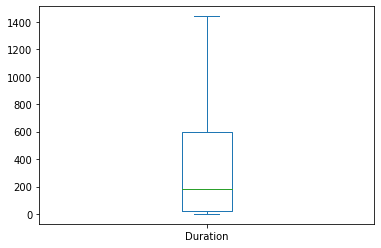

In [12]:
df['Duration'].plot(kind='box',showfliers=False) #without outliers 

### (5pts) Part 1d: Observations and Conclusions

Based on your analysis on part 1b and 1c, what observations or conclusions can you make from the data?

Observations:
1.   There are some outliers in the data which are very high values. After removing outliers, the range of values is around 1400 seconds(~24mins).
2.   From the boxplots in 1b and 1c(ignoring outliers), it is clear that the duration values are concentrated towards the lower values.
3.   Around 75% of the values are in the range of 0 to 600 seconds(0 to 10 mins). It can be inferred that the distribution of the duration values is right-skewed(concentrated in the left and tapering towards the right).



### (5pts) Part 1e: Next Steps

Now is your chance to conduct an interesting analysis on the UFO data you have collected. This is open-ended, so you may choose whatever direction you like. For example, you might want to take a look at the shape of the UFOs or perhaps the temporal aspects of the reports. 

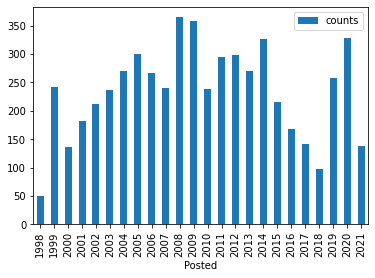

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ufos_in_texas.csv')

df['Posted'] = pd.to_datetime(df.Posted)
df['Posted'] = df.Posted.dt.year
newdf = df.groupby('Posted').size().reset_index(name='counts')
newdf.plot(x= 'Posted', y = 'counts', kind = 'bar')

0.9423147133990507


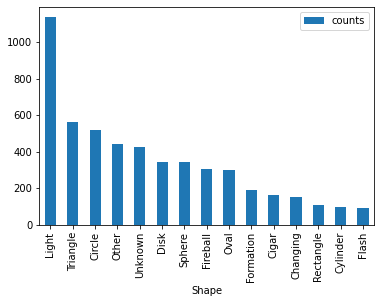

In [23]:
df = pd.read_csv('ufos_in_texas.csv')
df_grouped_shapes =  df.groupby('Shape').size().reset_index(name='counts')
df_grouped_shapes = df_grouped_shapes.sort_values(['counts'], ascending=False)
df_top_shapes = df_grouped_shapes[0:15]
percentage_of_data = df_top_shapes['counts'].sum()/df_grouped_shapes['counts'].sum()
print(percentage_of_data)
df_top_shapes.plot(x= 'Shape', y = 'counts', kind = 'bar')


Temporal analysis:
*   I considered the 'Posted' column and extracted the year information of all the reportings.
*   The trend of the number of reportings of UFOs on the site is going upwards from 1998 to 2008. This is followed by some variations in both directions.
*   Although there is no definite trend post 2008, the earlier uptrend could be attributed to the increasing number of users joining the internet with computers becoming easily available.

Shape analysis:
*   I grouped the reportings by shape and considered the top 16 most seen shapes for analysis. These correspond to 94% of the dataset.
*   The most reported shape is that of 'light'. Among the other shapes, 'Flash' can be considered similar to 'light'.
*   Among other shapes, 'circle', 'disk', 'sphere' can be considered as same shape.
*   In summary, people saw flashes of light or circular shaped formations in the sky and concluded that it is a UFO.



## (50 points) Part 2: Association Rules in Movie Rating Behaviors

For the second part of this homework, we're going to examine movies using our understanding of association rules, to find movies that "go together". For this part, you will implement the apriori algorithm, and apply it to a movie rating dataset. We'll use the [MovieLens](https://grouplens.org/datasets/movielens/) dataset.

First, run the next cell to load the dataset we are going to use.

In [166]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [145]:
!ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In this dataset, there are four columns: `userId` is the integer ids of users, `movieId` is the integer ids of movies, `rating` is the rate of the user gives to the movie, and `timestamp` which we do not use here. Each row denotes that the user of given `userId` rated the movie of the given `movieId`. We are going to treat each user as a "basket", so you will need to collect all the movies that have been rated by a single user as a basket. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors where:

1. Define `rating` >= 3 is "like" (that is, only consider movie ratings of 3 or higher in your baskets; you may ignore all others)
2. `minsup` == 40 (out of 600 users/baskets); we may adjust this based on the discussion on Campuswire
3. `minconf` == to be determined by a discussion on Campuswire. You may try several different choices, but we will converge on a good choice for everyone for the final submission.
 
We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. Do not copy-paste any existing code. We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing. Furthermore, you should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method. 

To help get you started, we can load the ratings with the following code snippet:

### (15pts) Step 1: Implement Apriori Algorithm
In this section, you need to implement the Apriori algorithm, we will check the correctness of your code and we encourage efficient implementation and skills of pruning.

In [167]:
# your code here
import pandas as pd
from collections import defaultdict


def get_support(itemset, freq_itemset_frequencies):
  return frequencies_of_freq_itemsets[itemset]

def get_candidate_itemsets(itemsets, length):
  candidates = set()
  for itemset in itemsets:
    for other_itemset in itemsets:
      if(len(itemset.union(other_itemset)) == length):
        candidates.add(itemset.union(other_itemset))
  
  return candidates

def get_freq_itemsets(itemsets, txs_list,  minsup, freq_itemset_frequencies):
  
  freq_itemset_set = set()
  for itemset in itemsets:
    #print(itemset)
    sup = 0
    for tx in txs_list:
      if(itemset.issubset(tx) == True):
        sup +=1
    #sup =  get_support(itemset, txs_list, minsup)
    if(sup >= minsup):
      freq_itemset_set.add(itemset)
      freq_itemset_frequencies[itemset] = sup # for confidence calculation 

  return freq_itemset_set


In [168]:

# read user ratings
allRatings = pd.read_csv("ml-latest-small/ratings.csv")

#keep reviews with ratings >=3 only
ratings_new = allRatings[allRatings['rating']>=3]

#initial itemset is the set of singleton movie ids
ratings_new = ratings_new.groupby('userId')
initial_candidate_list = set() #set having individual movies as sets
txs_list = [] #database of transactions
for userId, data in ratings_new:
  #each transaction(movies reviewed by a given user) is a frozen set
  txs_list.append(frozenset(data['movieId']))
  for movie in data['movieId']:
    # initial_candidate_list is the set of all unique movies reviewed by the users 
    initial_candidate_list.add(frozenset([movie]))

print("Size of candidate itemsets for k = 1: {}".format(len(initial_candidate_list)))

#keep track of the support of all the frequent itemsets which form the keys of this dictionary.
#this will be used during the calculation of the confidence values
frequencies_of_freq_itemsets = defaultdict(int)

minsup_val = 150
singleton_freq_itemset = get_freq_itemsets(initial_candidate_list, txs_list, minsup_val, frequencies_of_freq_itemsets)
print("Size of filtered itemsets for k = 1: {}".format(len(singleton_freq_itemset)))

final_itemsets = list() #list of sets where each set contains itemsets indexed by the length of itemsets
final_itemsets.append(set()) # for k=0 , dummy null set
final_itemsets.append(singleton_freq_itemset)

k = 2
prev = singleton_freq_itemset

while(len(prev) > 1):
  #create new extended itemsets
  candidates = get_candidate_itemsets(prev, k)
  prev = candidates
  print("Size of candidate itemsets for k = {}: {}".format(k, len(candidates)))
  if(len(candidates) > 0):
    result = get_freq_itemsets(candidates, txs_list, minsup_val, frequencies_of_freq_itemsets)
    if(len(result)>0):
      final_itemsets.append(result)
    prev = result
    print("Size of filtered itemsets for k = {}: {}".format(k, len(result)))
  k=k+1

  #reference implementation: https://github.com/asaini/Apriori/blob/541c1d268880649e90be25c0f326fb1597ad9c51/apriori.py

Size of candidate itemsets for k = 1: 8452
Size of filtered itemsets for k = 1: 37
Size of candidate itemsets for k = 2: 666
Size of filtered itemsets for k = 2: 30
Size of candidate itemsets for k = 3: 87
Size of filtered itemsets for k = 3: 2
Size of candidate itemsets for k = 4: 1
Size of filtered itemsets for k = 4: 0


### (5pts) Step 2: Print Your Association Rules

Next you should print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> 
movie_name_k**

where the movie names can be fetched by joining the movieId with the file `movies.csv`. For example, one rule that you might find is:

**Matrix, The (1999),  Star Wars: Episode V - The Empire Strikes Back (1980),  Star Wars: Episode IV - A New Hope (1977),  -> 
Star Wars: Episode VI - Return of the Jedi (1983)**

In [169]:
# your code here
import itertools

minconf = 0.8

movie_info = pd.read_csv("ml-latest-small/movies.csv")

def genAssociateRules(itemset, minconf, frequencies):
  '''
  returns the association rules for a given itemset given
  the itemset, min confidence value and the frequencies(support) of all itemsets
  '''
  rules =[]
  rulecount = 0

  for length in range(1,len(itemset)+1):
    subsets_list = list(itertools.combinations(itemset, length))
    for subset in subsets_list:
      #association rule : antecedent => consequent
      antecedent = frozenset(itemset.difference(subset))
      if(len(antecedent)>0 and len(antecedent)<len(itemset)):
        num = frequencies[itemset]
        den = frequencies[antecedent]
        conf = float(num)/den
        if(conf >= minconf):
          rulecount+=1
          #get the corresponding movie names from the ids
          antecedent_movies = []
          consequent_movies = []
          for id in antecedent:
            antecedent_movies.append(movie_info[movie_info['movieId'] == id]['title'].values[0])
          for id in subset:
            consequent_movies.append(movie_info[movie_info['movieId'] == id]['title'].values[0])
          rules.append(tuple([antecedent_movies, consequent_movies]))

  return rules

In [170]:
# read user ratings
allRatings = pd.read_csv("ml-latest-small/ratings.csv")

#keep reviews with ratings >=3 only
ratings_new = allRatings[allRatings['rating']>=3]

#initial itemset is the set of singleton movie ids
ratings_new = ratings_new.groupby('userId')
initial_candidate_list = set() #set having individual movies as sets
txs_list = [] #database of transactions
for userId, data in ratings_new:
  #each transaction(movies reviewed by a given user) is a frozen set
  txs_list.append(frozenset(data['movieId']))

In [171]:
association_rules = []
for itemsets_of_len_k in final_itemsets:
  for itemset in itemsets_of_len_k:
    rules_list = genAssociateRules(itemset, minconf, frequencies_of_freq_itemsets)
    if(len(rules_list)>0):
      for rule in rules_list:
        formatted_rule = ''
        for movie in rule[0]:
          formatted_rule = formatted_rule + str(movie) + ','
        formatted_rule = formatted_rule.rstrip(',') + ' => '
        for movie in rule[1]:
          formatted_rule = formatted_rule + str(movie) + ','
        association_rules.append(formatted_rule.rstrip(','))

In [172]:
i=1
for rule in association_rules:
  print(str(i) + '. ' + rule)
  i=i+1

1. Lord of the Rings: The Fellowship of the Ring, The (2001) => Lord of the Rings: The Return of the King, The (2003)
2. Lord of the Rings: The Return of the King, The (2003) => Lord of the Rings: The Fellowship of the Ring, The (2001)
3. Jurassic Park (1993) => Forrest Gump (1994)
4. Star Wars: Episode V - The Empire Strikes Back (1980) => Star Wars: Episode IV - A New Hope (1977)
5. Star Wars: Episode VI - Return of the Jedi (1983) => Star Wars: Episode IV - A New Hope (1977)
6. Lord of the Rings: The Fellowship of the Ring, The (2001) => Lord of the Rings: The Two Towers, The (2002)
7. Lord of the Rings: The Two Towers, The (2002) => Lord of the Rings: The Fellowship of the Ring, The (2001)
8. Star Wars: Episode VI - Return of the Jedi (1983) => Star Wars: Episode V - The Empire Strikes Back (1980)
9. Seven (a.k.a. Se7en) (1995) => Pulp Fiction (1994)
10. Lord of the Rings: The Return of the King, The (2003) => Lord of the Rings: The Two Towers, The (2002)
11. Lord of the Rings: The

### (15pts) Step 3: Implement Random Sampling

We discussed in class a method to randomly sample baskets to avoid the overhead of reading the entire set of baskets (which in practice, could amount to billions of baskets). For this part, you should implement such a random sampling approach that takes a special parameter **alpha** that controls the size of the sample: e.g., alpha = 0.10 means to sample 10% of the baskets (our users, in this case). 

Vary **alpha** and report the number of frequent itemsets you find and how this compares to the number of frequent itemsets in the entire dataset. What do you discover?


In [173]:
# your code here
import random
import math
import numpy as np


def get_random_sampled_freq_itemsets(original_txs_list= None, original_freq_itemsets = None, alpha_list = None, relax_factor_list = None, minsup = 50, change_minsup = True, check_false_positives=True):
  '''
  inputs: 
  original_txs_list : unsampled list of transactions, used for sampling
  original_freq_itemsets : set of frequent itemsets generated without sampling, used to check for false positives
  alpha_list : list of the random sampling factors(alpha) to be tested
  relax_factor_list : additional scaling factor for the minsup when random sampling is done
  minsup: minsup value to be considered (without sampling)
  change_minsup : flag used to enable/disable changign minsup value after random sampling
  check_false_positives: flag used to enable/disable checking for false positives
  
  Output: 
  prints out the frequent itemsets for different lengths
  '''

  for alpha in alpha_list:
    print("alpha = {}".format(alpha))
    print("------------")
    for relax_factor in relax_factor_list:

      sample_size = math.ceil(len(original_txs_list)*alpha)
      sampled_txs = [original_txs_list[i] for i in sorted(random.sample(range(len(original_txs_list)), sample_size))]

      print("size of sampled database: {}".format(len(sampled_txs)))

      initial_candidate_list = set() #set having individual movies as sets

      for movie_set in sampled_txs:
        for movie in movie_set:
          initial_candidate_list.add(frozenset([movie]))

      #print(len(initial_candidate_list))
      frequencies_of_freq_itemsets = defaultdict(int)

      new_minsup = minsup
      print(" ")
      print("minsup = {}".format(minsup))

      if(change_minsup == True):
        new_minsup = minsup * alpha * relax_factor
        #print("------------")
        print("relax_factor = {}".format(relax_factor))
        print("minsup_sampled = {}".format(new_minsup))
        #print("------------")
        print(" ")

      print("Size of candidate itemsets for k = 1: {}".format(len(initial_candidate_list)))

      singleton_freq_itemset = get_freq_itemsets(initial_candidate_list, sampled_txs, new_minsup, frequencies_of_freq_itemsets)

      total_freq_itemset_count = len(singleton_freq_itemset)
      
      print("Size of filtered itemsets for k = 1: {}".format(len(singleton_freq_itemset)))
      print(" ")

      final_itemsets_sampled = list() #list of sets where each set contains itemsets indexed by the length of itemsets
      final_itemsets_sampled.append(set())
      final_itemsets_sampled.append(singleton_freq_itemset)
      
      k = 2

      prev = singleton_freq_itemset

      while(len(prev) > 1):
        #create new extended itemsets
        candidates = get_candidate_itemsets(prev, k)
        prev = candidates
        print("Size of candidate itemsets for k = {}: {}".format(k, len(candidates)))
        if(len(candidates) > 0):
          result = get_freq_itemsets(candidates, sampled_txs, new_minsup, frequencies_of_freq_itemsets)
          if(len(result)>0):
            final_itemsets_sampled.append(result)
          prev = result
          print("Size of filtered itemsets for k = {}: {}".format(k, len(result)))
          total_freq_itemset_count+=len(result)
        k=k+1
        print(" ")
      
      print("Total number of frequent itemsets found = {}".format(total_freq_itemset_count))

      if(check_false_positives == True):
        j=1
        false_positives = np.zeros(len(final_itemsets_sampled))
        for itemsets in final_itemsets_sampled[1:]:
          for itemset in itemsets:
            if(j < len(original_freq_itemsets)):#if original freq itemset list does not contain itemsets of this length, then mark all the freq itemsets as false positives
              if(itemset not in original_freq_itemsets[j]):
                false_positives[j]+=1
            else:
              false_positives[j] = len(final_itemsets_sampled[j])
          print("False positive count in itemsets of length k:{} = {}".format(j,int(false_positives[j])))
          j=j+1
        print("Total number of false positives found = {}".format(int(sum(false_positives))))
      
      print(" ")



In [174]:
alpha_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
relax_factor_list = [1]
original_txs_list = txs_list
original_freq_itemsets = final_itemsets
minsup = 150
get_random_sampled_freq_itemsets(original_txs_list, original_freq_itemsets, alpha_list, relax_factor_list, minsup,False, False )

alpha = 0.4
------------
size of sampled database: 244
 
minsup = 150
Size of candidate itemsets for k = 1: 6421
Size of filtered itemsets for k = 1: 0
 
Total number of frequent itemsets found = 0
 
alpha = 0.5
------------
size of sampled database: 305
 
minsup = 150
Size of candidate itemsets for k = 1: 6240
Size of filtered itemsets for k = 1: 2
 
Size of candidate itemsets for k = 2: 1
Size of filtered itemsets for k = 2: 0
 
Total number of frequent itemsets found = 2
 
alpha = 0.6
------------
size of sampled database: 366
 
minsup = 150
Size of candidate itemsets for k = 1: 5486
Size of filtered itemsets for k = 1: 4
 
Size of candidate itemsets for k = 2: 6
Size of filtered itemsets for k = 2: 0
 
Total number of frequent itemsets found = 4
 
alpha = 0.7
------------
size of sampled database: 427
 
minsup = 150
Size of candidate itemsets for k = 1: 7448
Size of filtered itemsets for k = 1: 8
 
Size of candidate itemsets for k = 2: 28
Size of filtered itemsets for k = 2: 0
 
To

Observations:
1.   alpha is varied while keeping the minsup constant.
2.   Reducing the dataset size alone (no change in minsup) by random sampling certainly reduces the number of frequent itemsets discovered.
3.   As seen in the above results, the number of frequent itemsets increases with the increase in alpha. This is because more transactions are considered with higher value of alpha which increases the likelihood of finding a frequent itemset.



### (10pts) Step 4: Check for False Positives

Next you should verify that the candidate pairs you discover by random sampling are truly frequent by comparing to the itemsets you discover over the entire dataset. 

For this part, consider another parameter **minsup_sample** that relaxes the minimum support threshold. For example if we want minsup = 1/100 for whole dataset, then try minsup_sample = 1/125 for the sample. This will help catch truly frequent itemsets.

Vary **minsup_sample** and report the number of frequent itemsets you find and the number of false positives you find. What do you discover?


In [175]:
# your code here

alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
relax_factor_list = [0.8]

original_txs_list = txs_list
original_freq_itemsets = final_itemsets

minsup_orignal = 150
get_random_sampled_freq_itemsets(original_txs_list, original_freq_itemsets, alpha_list, relax_factor_list, minsup_orignal, True, True )

alpha = 0.1
------------
size of sampled database: 61
 
minsup = 150
relax_factor = 0.8
minsup_sampled = 12.0
 
Size of candidate itemsets for k = 1: 3502
Size of filtered itemsets for k = 1: 79
 
Size of candidate itemsets for k = 2: 3081
Size of filtered itemsets for k = 2: 157
 
Size of candidate itemsets for k = 3: 1470
Size of filtered itemsets for k = 3: 57
 
Size of candidate itemsets for k = 4: 178
Size of filtered itemsets for k = 4: 8
 
Size of candidate itemsets for k = 5: 7
Size of filtered itemsets for k = 5: 0
 
Total number of frequent itemsets found = 301
False positive count in itemsets of length k:1 = 42
False positive count in itemsets of length k:2 = 131
False positive count in itemsets of length k:3 = 55
False positive count in itemsets of length k:4 = 8
Total number of false positives found = 236
 
alpha = 0.2
------------
size of sampled database: 122
 
minsup = 150
relax_factor = 0.8
minsup_sampled = 24.0
 
Size of candidate itemsets for k = 1: 4985
Size of filt

Observations:

*   In the above code, minsup is scaled proportionately in accordance with the random sampling factor (alpha)
*   The minsup is additionally scaled by a relaxation factor, set to 0.8
*   Reducing the dataset size alone (no change in minsup) by random sampling certainly reduces the number of frequent itemsets discovered as seen in the previous part.
*   Scaling the minsup along with random sampling gives more frequent itemsets.
*   Many of the frequent itemsets found this way have low frequency in the original dataset and hence do not qualify as frequent itemsets. These are marked as false positives.




### (5pts) Step 5: Extensions and Next Steps

So far, we have been working with a fairly small dataset. For this last question, try your sampling-based approach on the much larger: **Movies 10M** dataset: https://files.grouplens.org/datasets/movielens/ml-10m.zip

First, we need to load this larger dataset:

In [156]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-10m.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [157]:
! ls ml-10M100K/

allbut.pl  movies.dat  ratings.dat  README.html  split_ratings.sh  tags.dat


In [158]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-10M100K/ratings.dat",sep='::', names=["userId", "movieId", "rating", "timestamp"], engine='python')
allRatings

,userId,movieId,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


Now you can begin your sampling over this larger dataset.

In [159]:
# your code here
from collections import defaultdict

#keep reviews with ratings >=3 only
ratings_new = allRatings[allRatings['rating']>=3]

#initial itemset is the set of singleton movie ids
ratings_new = ratings_new.groupby('userId')
initial_candidate_list = set() #set having individual movies as sets
txs_list = [] #database of transactions
for userId, data in ratings_new:
  txs_list.append(frozenset(data['movieId']))
  for movie in data['movieId']:
    initial_candidate_list.add(frozenset([movie]))

In [142]:
print(len(txs_list))

69863


In [163]:
alpha_list = [0.1]
relax_factor_list = [0.8]
original_txs_list = txs_list
original_freq_itemsets = None

minsup = 15000  # in the small movies data set, #transactions was around 600 and minsup was taken as 150. So choosing 15000 as minsup in the same proportion
get_random_sampled_freq_itemsets(original_txs_list, original_freq_itemsets, alpha_list, relax_factor_list, minsup,True, False )

alpha = 0.1
------------
size of sampled database: 6987
 
minsup = 15000
relax_factor = 0.8
minsup_sampled = 1200.0
 
Size of candidate itemsets for k = 1: 9583
Size of filtered itemsets for k = 1: 94
 
Size of candidate itemsets for k = 2: 4371
Size of filtered itemsets for k = 2: 293
 
Size of candidate itemsets for k = 3: 3324
Size of filtered itemsets for k = 3: 223
 
Size of candidate itemsets for k = 4: 871
Size of filtered itemsets for k = 4: 28
 
Size of candidate itemsets for k = 5: 60
Size of filtered itemsets for k = 5: 0
 
Total number of frequent itemsets found = 638
 



*   I have set the minsup to 15000 (proportionate to the previous case).
*   10% of the total samples are considered for analysis. Further, the minsup is scaled by 0.1 to account for the sampling and further relaxed by scaling by 0.8. This effectively makes the minsup as 1200.
*   The total number of frequent itemsets discovered are 638.

